# Analyzing global internet patterns
![](img/visualize-internet-usage.jpg)

*A [DataCamp](https://datacamp.com) challenge* &nbsp;&nbsp;&nbsp;&nbsp;{octicon}`calendar` Jan, 2025  

{bdg-secondary-line}`k-means clustering`

## Executive Summary

This analysis categorizes countries into three distinct groups based on the rate and pattern of internet adoption between 2000 and 2022:

1. **Early Adopters**:
Countries in this group experienced rapid internet usage growth, particularly in the early years, surpassing 60% by 2007 and exceeding 90% by 2022. The steep initial growth reflects early investment in internet infrastructure, followed by a plateau in recent years, indicating market saturation.


3. **Mid Adopters**:
These countries showed a more gradual adoption curve, reaching 40% internet usage by 2012 and steadily growing. By 2022, nearly 80% of the population was online. However, a visible slowdown suggests they may not reach the adoption levels of early adopters, potentially plateauing below 90%.

5. **Late Adopters**:
These countries saw much slower internet growth initially, but adoption accelerated after 2010. By 2022, internet usage reached approximately 40%, indicating continued growth. However, a recent tendency toward flattening at this lower adoption rate (~40%) suggests the curve may plateau prematurely.

In conclusion, early adopters are approaching full internet penetration, while mid and late adopters are showing signs of slower growth before reaching higher usage levels. Continued investment in infrastructure may be necessary to support further growth, particularly for late adopters.

## The project
The dataset highlights internet usage for different countries from 2000 to 2023. The goal is import, clean, analyze and visualize the data to understand how internet usage has changed over time and the countries still widely impacted by lack of internet availability.

## The data
|   Column name  |   Description | 
|---------------|-----------|
| Country Name | Name of the country |
| Country Code | Countries 3 character country code|
| 2000 | Contains the % of population of individuals using the internet in 2000  |
| 2001 | Contains the % of population of individuals using the internet in 2001  |
| 2002 | Contains the % of population of individuals using the internet in 2002  |
| 2003 | Contains the % of population of individuals using the internet in 2003  |
| .... | ...  |
| 2023 | Contains the % of population of individuals using the internet in 2023  |

## Data validation

In [1]:
# Import packages
import geopandas as gpd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans

# Read the data
df = pd.read_csv("data/internet_usage.csv")
df

Country Name Country Code       2000        2001       2002  \
0              Afghanistan          AFG         ..  0.00472257  0.0045614   
1                  Albania          ALB   0.114097    0.325798   0.390081   
2                  Algeria          DZA   0.491706    0.646114    1.59164   
3           American Samoa          ASM         ..          ..         ..   
4                  Andorra          AND    10.5388          ..    11.2605   
..                     ...          ...        ...         ...        ...   
212  Virgin Islands (U.S.)          VIR    13.8151     18.3758    27.4944   
213     West Bank and Gaza          PSE    1.11131     1.83685    3.10009   
214            Yemen, Rep.          YEM  0.0825004   0.0908025   0.518796   
215                 Zambia          ZMB   0.191072     0.23313   0.477751   
216               Zimbabwe          ZWE   0.401434    0.799846        1.1   

          2003      2004     2005     2006     2007  ...     2014     2015  \
0    0.0878913  0.105809  1.22415  2.10712      1.9  ...        7     8.26   
1       0.9719   2.42039  6.04389  9.60999  15.0361  ...     54.3     56.9   
2      2.19536   4.63448  5.84394  7.37598  9.45119  ...     29.5     38.2   
3           ..        ..       ..       ..       ..  ...       ..       ..   
4      13.5464    26.838  37.6058  48.9368    70.87  ...     86.1     87.9   
..         ...       ...      ...      ...      ...  ...      ...      ...   
212    27.4291    27.377  27.3443  27.3326  27.3393  ...    50.07  54.8391   
213    4.13062    4.4009   16.005    18.41   21.176  ...  53.6652     56.7   
214   0.604734  0.881223   1.0486  1.24782     5.01  ...    22.55  24.0854   
215   0.980483       1.1      1.3      1.6      1.9  ...      6.5      8.8   
216        1.8       2.1      2.4      2.4        3  ...  16.3647  22.7428   

        2016     2017     2018     2019     2020     2021     2022     2023  
0         11     13.5     16.8     17.6     18.4       ..       ..       ..  
1       59.6     62.4     65.4  68.5504  72.2377  79.3237  82.6137  83.1356  
2    42.9455  47.6911  49.0385  58.9776  60.6534  66.2356  71.2432       ..  
3         ..       ..       ..       ..       ..       ..       ..       ..  
4       89.7  91.5675       ..  90.7187  93.2056  93.8975  94.4855       ..  
..       ...      ...      ...      ...      ...      ...      ...      ...  
212  59.6083  64.3775       ..       ..       ..       ..       ..       ..  
213     59.9     63.3     64.4  70.6226    76.01    81.83  88.6469  86.6377  
214  24.5792  26.7184       ..       ..  13.8152  14.8881  17.6948       ..  
215     10.3     12.2     14.3     18.7  24.4992  26.9505  31.2342       ..  
216    23.12     24.4       25  26.5883  29.2986  32.4616  32.5615       ..  

[217 rows x 26 columns]

Missing data is marked as "..". I will replace ".." with NaN values to map out blank cells with the help of `missingno` library.

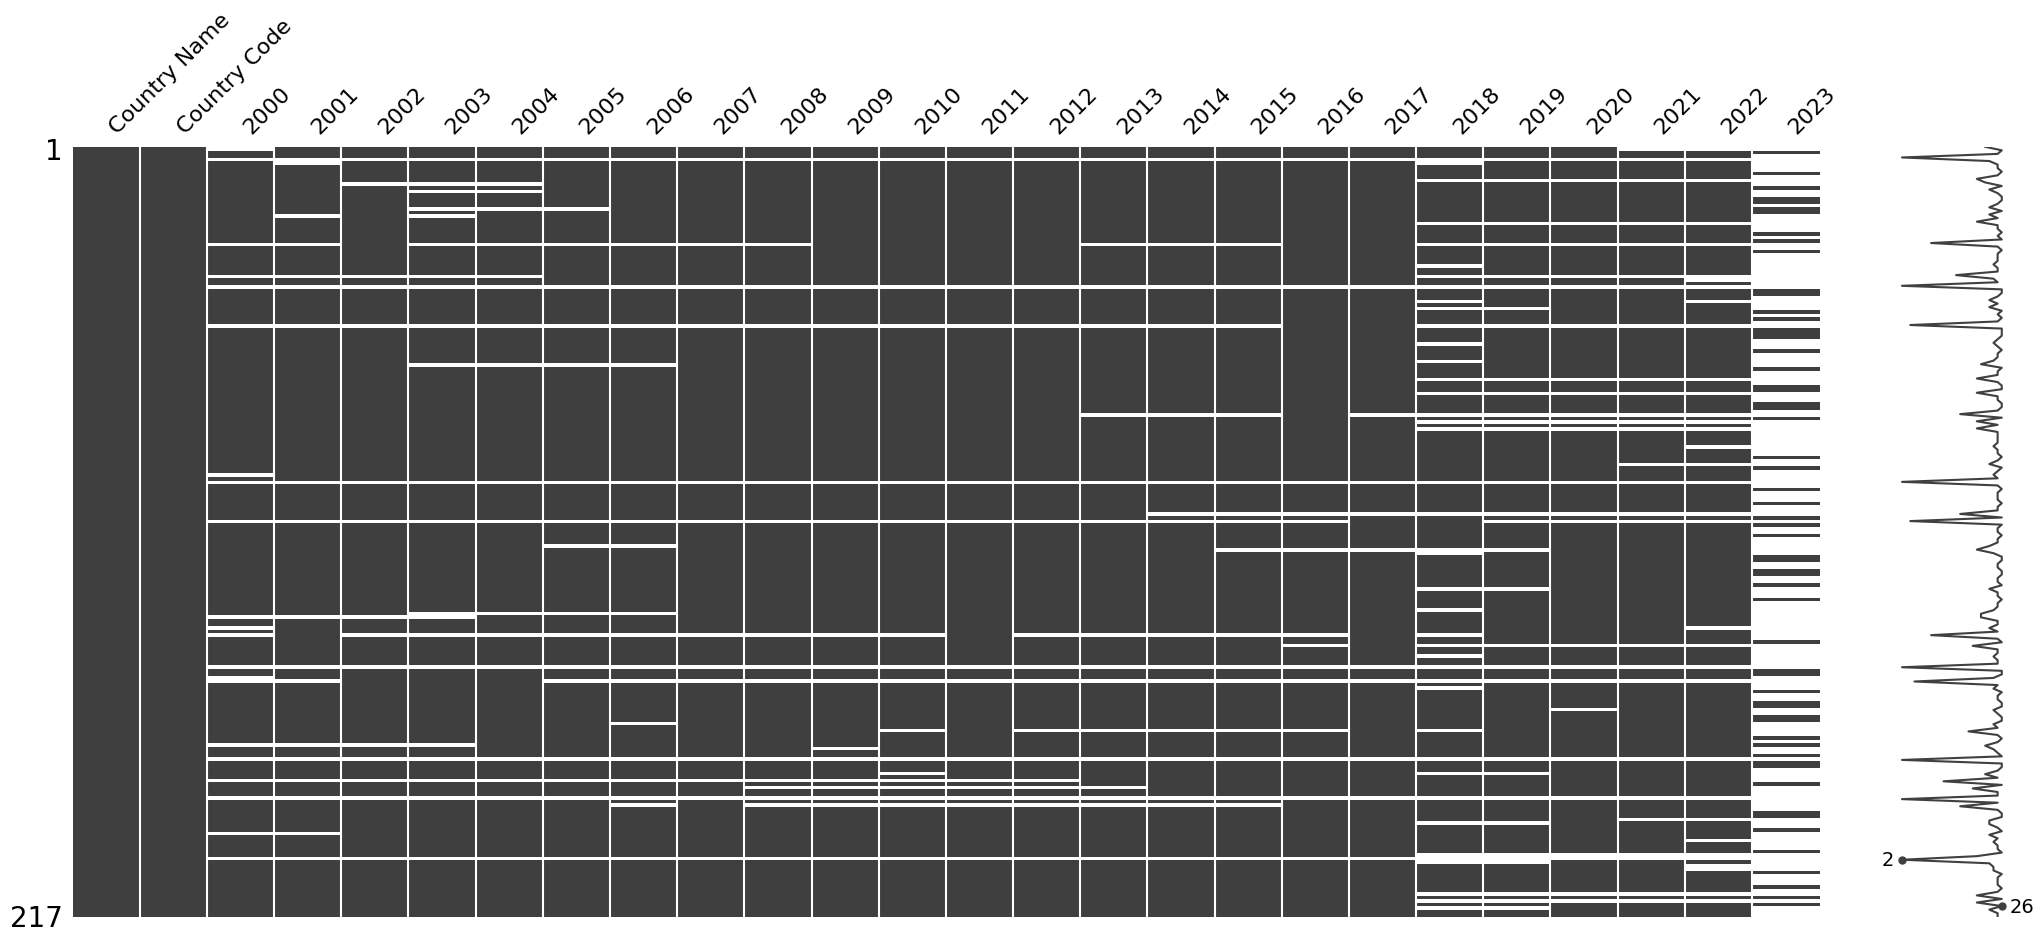

In [2]:
# Replace ".." with missing values
df = df.replace({"..": np.nan})

# Plot missing values map
msno.matrix(df)
plt.show()

The data from many countries is missing for the last recorded year, 2023. Even if I interpolate it using data from the previous year, the trends will flatten, and this may distort the reading of reality, so I will drop 2023 column.

In [3]:
# Drop 2023 year
df = df.drop("2023", axis=1)

Convert numerical columns to float.

In [4]:
# Convert to float type numerical columns only
df[df.columns[2:]] = df[df.columns[2:]].astype("float")

Check duplicates:

In [5]:
# Check on all columns
print(f"Duplicated rows in whole table -> {df.duplicated().sum()}")

# Check on numeric columns
print(
    f"Duplicated rows in the numeric table -> {df.duplicated(subset=df.columns[2:]).sum()}\n"
)

# Show duplicated
df.loc[df.duplicated(subset=df.columns[2:]), :]

Duplicated rows in whole table -> 0
Duplicated rows in the numeric table -> 6



Country Name Country Code  2000  2001  2002  2003  2004  \
39             Channel Islands          CHI   NaN   NaN   NaN   NaN   NaN   
94                 Isle of Man          IMN   NaN   NaN   NaN   NaN   NaN   
146   Northern Mariana Islands          MNP   NaN   NaN   NaN   NaN   NaN   
172  Sint Maarten (Dutch part)          SXM   NaN   NaN   NaN   NaN   NaN   
183   St. Martin (French part)          MAF   NaN   NaN   NaN   NaN   NaN   
200   Turks and Caicos Islands          TCA   NaN   NaN   NaN   NaN   NaN   

     2005  2006  2007  ...  2013  2014  2015  2016  2017  2018  2019  2020  \
39    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
94    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
146   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
172   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
183   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
200   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     2021  2022  
39    NaN   NaN  
94    NaN   NaN  
146   NaN   NaN  
172   NaN   NaN  
183   NaN   NaN  
200   NaN   NaN  

[6 rows x 25 columns]

Duplicates correspond to numeric columns in countries with no data at all. I will drop these rows.

In [6]:
# Drop rows with no values at all
df = df.drop_duplicates(subset=df.columns[2:])

To further eliminate missing values I will **linearly interpolate** the gaps across columns (years).

In the case of consecutive NaNs, I will fill them both forward and backward, with a limited number of consecutive NaNs. But how do we determine the maximum number of consecutive NaNs to fill? Let’s analyze how many countries with remaining NaNs are removed based on the limit we choose.

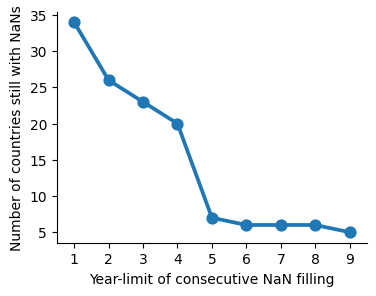

In [7]:
# Init lists
n_countries_with_nan = []
n_limit = []

# Iterate through a limit range
for limit in range(1, 10):
    # Interpolate
    interpolated = df.loc[:, df.columns[2:]].interpolate(
        limit=limit, limit_direction="both", axis=1
    )

    # Build dataframe with interpolated values
    dfi = df.loc[:, ["Country Name", "Country Code"]].join(interpolated)

    # Get number of missing values per row
    nans = dfi.isna().sum(axis=1)

    # Show countries with still missing values
    df_nans = dfi.join(nans.to_frame(name="nans"))
    df_nans = df_nans.loc[df_nans["nans"] != 0, ["Country Name", "nans"]]

    # Store the number of countries still with missing values
    n_countries_with_nan.append(len(df_nans))
    n_limit.append(limit)

# Plot
limit_df = pd.DataFrame(
    {"n_limit": n_limit, "n_countries_with_nan": n_countries_with_nan}
)
fig, ax = plt.subplots(figsize=(4, 3))
sns.pointplot(x="n_limit", y="n_countries_with_nan", data=limit_df, ax=ax)
ax.set_xlabel("Year-limit of consecutive NaN filling", size=10)
ax.set_ylabel("Number of countries still with NaNs", size=10)
sns.despine()
plt.show()

By limiting the filling of missing values to 5 consecutive years, we significantly reduce the number of countries that still have gaps. Assuming that values can be carried over for these 5 years may be a big assumption, but since I want to include the maximum number of countries in the study, I will use this as the cutoff criterion.

In [8]:
# Define limit years to fill NaNs
limit = 5

# Interpolate
interpolated = df.loc[:, df.columns[2:]].interpolate(
    limit=limit, limit_direction="both", axis=1
)

# Build dataframe with interpolated values
dfi = df.loc[:, ["Country Name", "Country Code"]].join(interpolated)

# Get number of missing values per row
nans = dfi.isna().sum(axis=1)

# Show countries with still missing values
df_nans = dfi.join(nans.to_frame(name="nans"))
df_nans = df_nans.loc[df_nans["nans"] != 0, ["Country Name", "nans"]]
df_nans

Country Name  nans
3               American Samoa    23
50                     Curacao    11
75                   Gibraltar     1
103  Korea, Dem. People's Rep.     4
105                     Kosovo    12
150                      Palau    13
178                South Sudan     8

These are the countries that still have NaNs. Given their population relevance, I will take a closer look at South Sudan and North Korea to understand what’s going on with them.

In [9]:
# Show South Sudan
dfi.loc[dfi["Country Name"] == "South Sudan", :]

Country Name Country Code  2000  2001  2002  2003  2004  2005  2006  2007  \
178  South Sudan          SSD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     ...  2013  2014  2015  2016  2017  2018  2019     2020     2021     2022  
178  ...   2.2   2.6   3.0   3.5   4.1   4.8   6.7  9.27123  9.64241  12.1407  

[1 rows x 25 columns]

South Sudan has no initial records because it was only recently declared an independent country, which explains the NaNs. Since the existing values are very low, I will fill in the NaNs with 0 to include this country in the analysis.

In [10]:
# Fill NaN with 0 for South Sudan
dfi.loc[dfi["Country Name"] == "South Sudan", :] = dfi.loc[
    dfi["Country Name"] == "South Sudan", :
].fillna(0)

# Show North Korea
dfi.loc[dfi["Country Name"] == "Korea, Dem. People's Rep.", :]

Country Name Country Code  2000  2001  2002  2003  2004  \
103  Korea, Dem. People's Rep.          PRK   0.0   0.0   0.0   0.0   0.0   

     2005  2006  2007  ...  2013  2014  2015  2016  2017  2018  2019  2020  \
103   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   NaN   NaN   

     2021  2022  
103   NaN   NaN  

[1 rows x 25 columns]

Missing values are just a prolongation of nul values, so as there is no information at all I will drop North Korea from the analysis together with the rest of the remaining smaller countries.

In [11]:
# Get indexes of rows with missing values
nan_rows = dfi.index[dfi.isna().sum(axis=1) != 0]

# Drop rows with missing values
dfi = dfi.drop(nan_rows)

# I will keep not interpolated df for plotting with missing values
df = df.drop(nan_rows)

# Get df info
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 216
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  205 non-null    object 
 1   Country Code  205 non-null    object 
 2   2000          205 non-null    float64
 3   2001          205 non-null    float64
 4   2002          205 non-null    float64
 5   2003          205 non-null    float64
 6   2004          205 non-null    float64
 7   2005          205 non-null    float64
 8   2006          205 non-null    float64
 9   2007          205 non-null    float64
 10  2008          205 non-null    float64
 11  2009          205 non-null    float64
 12  2010          205 non-null    float64
 13  2011          205 non-null    float64
 14  2012          205 non-null    float64
 15  2013          205 non-null    float64
 16  2014          205 non-null    float64
 17  2015          205 non-null    float64
 18  2016          205 non-null    float

## Cluster analysis

To identify any patterns in the evolution of internet usage across countries, I will proceed to cluster them into different groups using the k-means clustering algorithm.

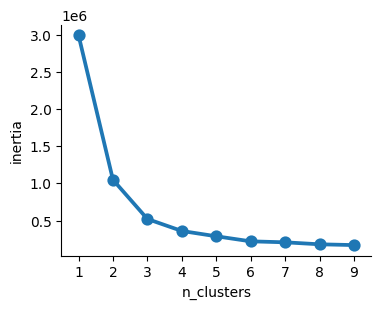

In [12]:
# Subset samples from dataframe
samples = dfi.loc[:, dfi.columns[2:]]

# Search for number of clusters
inertias = []
clusters = []
for n_clusters in range(1, 10):
    model = KMeans(n_clusters=n_clusters)
    model.fit(samples)
    inertias.append(model.inertia_)
    clusters.append(n_clusters)

# Plot
inertias_df = pd.DataFrame({"n_clusters": clusters, "inertia": inertias})
fig, ax = plt.subplots(figsize=(4, 3))
sns.pointplot(x="n_clusters", y="inertia", data=inertias_df, ax=ax)
sns.despine()
plt.show()

According to the Elbow Method, I choose "3" as the optimal number of clusters.

Therefore, samples will be labeled as either '0', '1', or '2'. Once labeled, I will plot the mean values for each group.

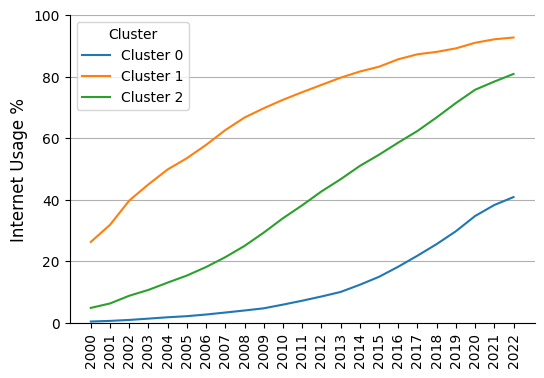

In [13]:
# Instantiate model with defined n_clusters
model = KMeans(n_clusters=3, random_state=42)

# Fit the model
model.fit(samples)

# Predict labels
labels = model.predict(samples)

# Insert labels in a new column the dataframe
dfi["label"] = labels
df["label"] = labels

# Subset by cluster label and calculate average values per year
df_0_avg = (
    dfi.loc[dfi["label"] == 0, dfi.select_dtypes(include="float").columns].mean()
).to_frame(name="Cluster 0")
df_1_avg = (
    dfi.loc[dfi["label"] == 1, dfi.select_dtypes(include="float").columns].mean()
).to_frame(name="Cluster 1")
df_2_avg = (
    dfi.loc[dfi["label"] == 2, dfi.select_dtypes(include="float").columns].mean()
).to_frame(name="Cluster 2")

# Join in a single dataframe
df_clusters = df_0_avg.join(df_1_avg).join(df_2_avg).reset_index(names="Year")

# Transform dataframe from wide to long format for plotting
df_clusters_l = df_clusters.melt(
    id_vars="Year", var_name="Cluster", value_name="Internet Usage"
)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(
    ax=ax,
    x="Year",
    y="Internet Usage",
    data=df_clusters_l,
    hue="Cluster",
    errorbar=None,
)
ax.tick_params(axis="x", labelsize=10, rotation=90)
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.set_xlabel("", fontsize=11)
ax.set_ylabel("Internet Usage %", fontsize=12)
ax.set_ylim(0, 100)
sns.despine()
plt.show()

The graph shows that the clusters identified by the algorithm correspond to groups of countries with different internet adoption rates and patterns:
- Cluster 0 -> I name it **"late adopters"**
- Cluster 1 -> I name it **"early adopters"**
- Cluster 2 -> I name it **"mid adopters"**

Now that we have identified the clusters, I will replace the labels for clusters '0', '1', and '2' with their corresponding meaningful category names and plot the results using interactive graphs, allowing users to select countries to display alongside the group trends.

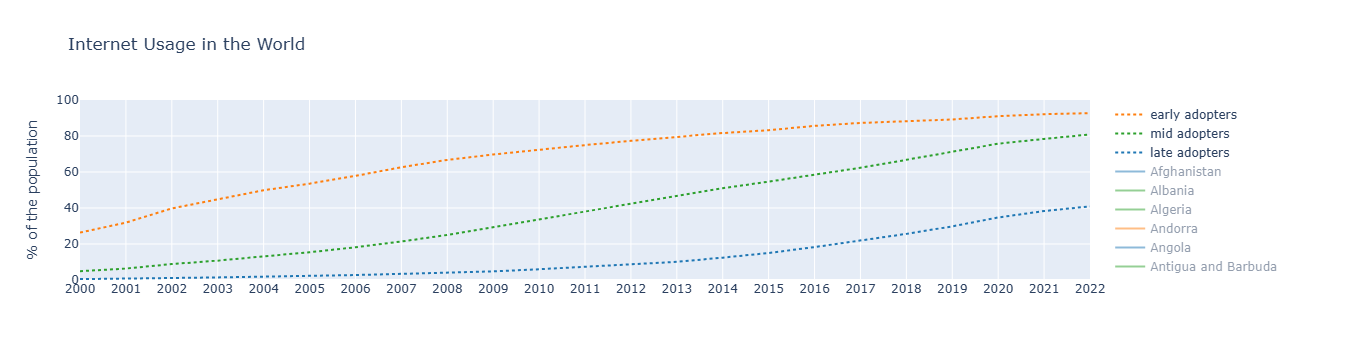

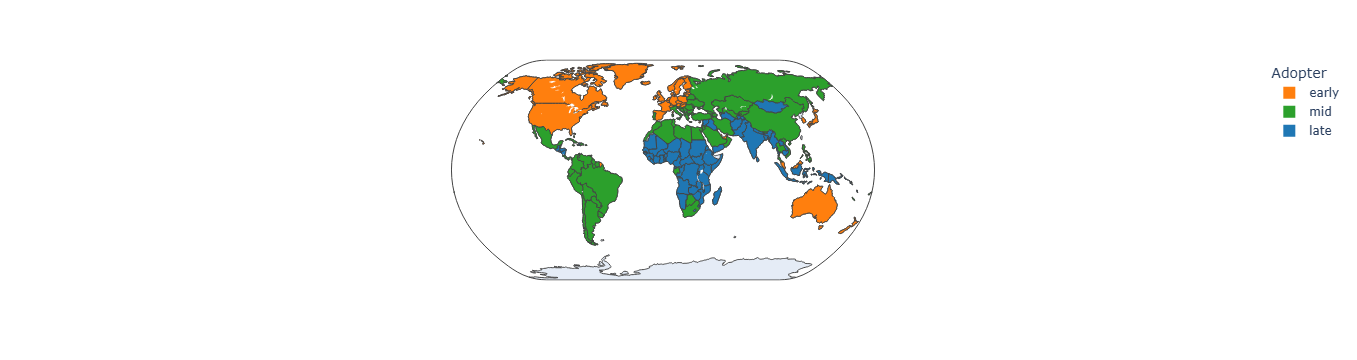

In [14]:
# Define categories
categories = ["early", "mid", "late"]

# Replace label number with category name
dfi["label"] = dfi["label"].replace(
    {0: categories[2], 1: categories[0], 2: categories[1]}
)
df["label"] = df["label"].replace(
    {0: categories[2], 1: categories[0], 2: categories[1]}
)

# Replace cluster label with category name
df_clusters_l["Cluster"] = df_clusters_l["Cluster"].replace(
    {"Cluster 0": categories[2], "Cluster 1": categories[0], "Cluster 2": categories[1]}
)
# Rename column name
dfi = dfi.rename(columns={"label": "Adopter"})
df = df.rename(columns={"label": "Adopter"})
df_clusters_l = df_clusters_l.rename(columns={"Cluster": "Adopter"})

# Convert the column to ordered categorical
dfi["Adopter"] = dfi["Adopter"].astype(
    pd.CategoricalDtype(categories=categories, ordered=True)
)
df["Adopter"] = df["Adopter"].astype(
    pd.CategoricalDtype(categories=categories, ordered=True)
)
df_clusters_l["Adopter"] = df_clusters_l["Adopter"].astype(
    pd.CategoricalDtype(categories=categories, ordered=True)
)

# Convert dataframes from wide to long format for plotting
dfi_long = dfi.melt(
    id_vars=["Country Name", "Country Code", "Adopter"],
    var_name="Year",
    value_name="Internet Usage",
)
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Adopter"],
    var_name="Year",
    value_name="Internet Usage",
)

# Define colors to match the ones that appeared in the clusters plotting
sns_tab10_blue = sns.color_palette("tab10").as_hex()[0]
sns_tab10_orange = sns.color_palette("tab10").as_hex()[1]
sns_tab10_green = sns.color_palette("tab10").as_hex()[2]

# Instance of plotly graphic object
fig = go.Figure()

# Add traces for each adopter type (cluster)
color_key = {"early": sns_tab10_orange, "mid": sns_tab10_green, "late": sns_tab10_blue}
for adopter in categories:  # ["early", "mid", "late"]:
    df_adopter = df_clusters_l.loc[df_clusters_l["Adopter"] == adopter, :]
    fig.add_trace(
        go.Scatter(
            x=df_adopter["Year"],
            y=df_adopter["Internet Usage"],
            mode="lines",
            name=f"{adopter} adopters",
            line=dict(color=color_key[adopter], dash="dot"),
            hovertemplate="%{fullData.name}<br> %{x:.0f}: %{y:.0f}%<extra></extra>",
        )
    )


# Add traces for each country
for country, adopter in zip(dfi["Country Name"], dfi["Adopter"]):
    df_country = df_long.loc[df_long["Country Name"] == country, :]
    fig.add_trace(
        go.Scatter(
            x=df_country["Year"],
            y=df_country["Internet Usage"],
            mode="lines",
            name=country,
            visible="legendonly",  # Hidden when first shown
            line=dict(color=color_key[adopter]),
            hovertemplate="%{fullData.name}<br> %{x:.0f}: %{y:.0f}%<extra></extra>",
        )
    )

# Layout parameters
fig.update_layout(
    # # Set width and height (in pixels)
    # width=1200,
    # height=600,
    # Set the range for the y-axis
    yaxis=dict(range=[0, 100]),
    # Set titles
    title="Internet Usage in the World",
    yaxis_title="% of the population",
)

fig.show()

# Plot world map choropleth
# Read into a geopandas dataframe countries' map and data
# Data downloaded from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
gdf = gpd.read_file("map/ne_110m_admin_0_countries.shp")

# Select some columns of interest
gdf = gdf.loc[:, ["NAME", "GU_A3", "CONTINENT", "POP_EST", "ECONOMY", "geometry"]]

# Change South Sudan's code to the one used in the dataset, otherwise will not merge and appear in map
gdf.loc[gdf["NAME"] == "S. Sudan", "GU_A3"] = "SSD"

# Merge to the left on geopandas dataframe
gdf_labels = gdf.merge(
    dfi.loc[:, ["Country Name", "Country Code", "Adopter"]],
    how="left",
    left_on="GU_A3",
    right_on="Country Code",
)

# Drop missing values (not matched after merging)
gdf_labels = gdf_labels.dropna()

# Create "id" column for plotting
gdf_labels["id"] = gdf_labels.index.astype(str)

# Wolrd map choropleth
fig = px.choropleth(
    gdf_labels,
    geojson=gdf_labels.__geo_interface__,
    locations="id",
    color="Adopter",
    hover_name="NAME",
    projection="natural earth",
    color_discrete_map={
        "early": sns_tab10_orange,
        "mid": sns_tab10_green,
        "late": sns_tab10_blue,
    },
    category_orders={  # Ensure the legend shows the ordered categories
        "Adopter": ["early", "mid", "late"]
    },
    hover_data={
        "id": False,  # Exclude the 'id' from hover
        "Adopter": True,  # Include 'name' (country names)
    },
)

# fig.update_layout(
#     width=800,
#     height=600,
# )

fig # Apparently, "fig.show()" does not render in jupyter-book!

## Conclusions
The most important conclusion of this study is likely the observation that the rate of growth in internet adoption is slowing down. While in early-adopter and even mid-adopter countries this seems to be due to natural saturation, the slowdown is particularly striking in late-adopter countries, as the proportion of the population using the internet in these countries is still considerably low. This could serve as a warning, indicating the need to invest in infrastructure and resources in these nations.